<a href="https://colab.research.google.com/github/zineb-111/24010156-Zineb-elmejdoubi-/blob/main/ML_10_12_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Bibliothèques importées avec succès.

2. Données chargées. Taille du dataset : (569, 31)
   Classes : ['malignant' 'benign'] (0 = Malin, 1 = Bénin)

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 840

4. Nettoyage des données...
   Imputation terminée (les NaN ont été remplacés par la moyenne).
   Valeurs manquantes restantes : 0

5. Analyse Exploratoire (EDA)...
   Statistiques descriptives (premières 5 colonnes) :
       mean radius  mean texture  mean perimeter    mean area  mean smoothness
count   569.000000    569.000000      569.000000   569.000000       569.000000
mean     14.130115     19.253253       91.927505   653.044917         0.096353
std       3.457717      4.198742       23.698676   342.556617         0.013394
min       6.981000      9.710000       47.920000   143.500000         0.052630
25%      11.740000     16.330000       75.490000   426.000000         0.086840
50%      13.560000     19.070000       87

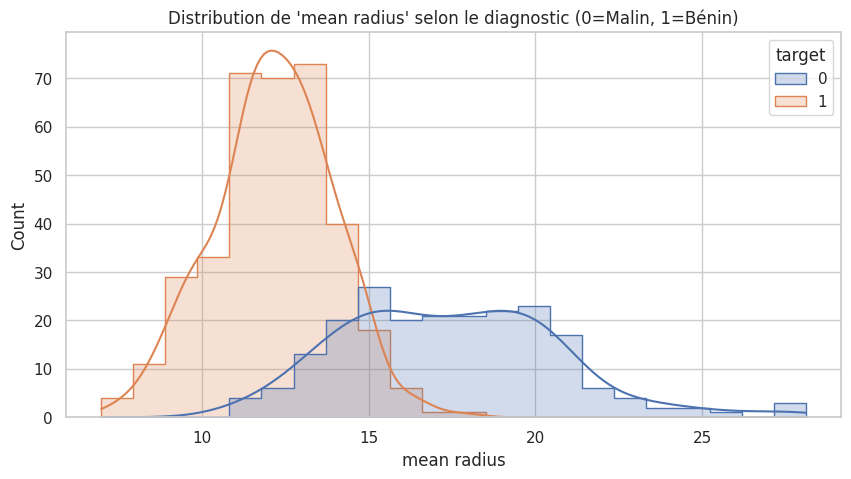

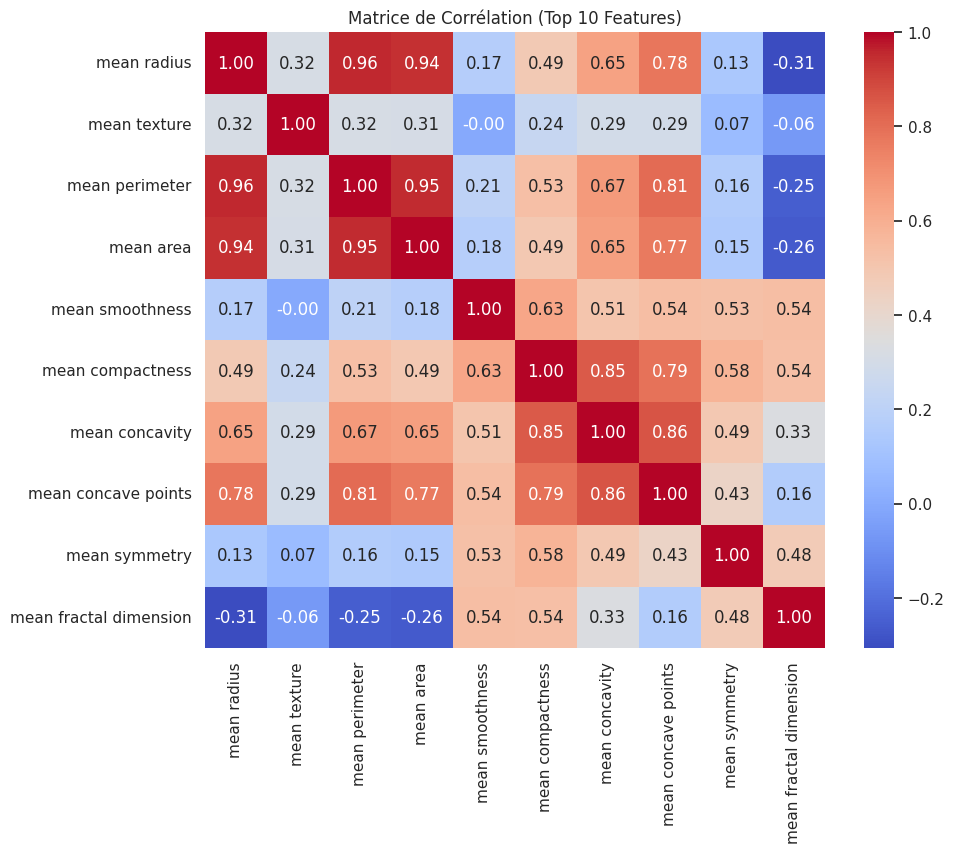


6. Séparation effectuée :
   Entraînement : 455 échantillons
   Test : 114 échantillons

7. Entraînement du modèle (Random Forest Classifier)...
   Modèle entraîné avec succès.

8. Évaluation des performances...
   >>> Accuracy Score : 95.61%

   >>> Rapport de Classification :
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



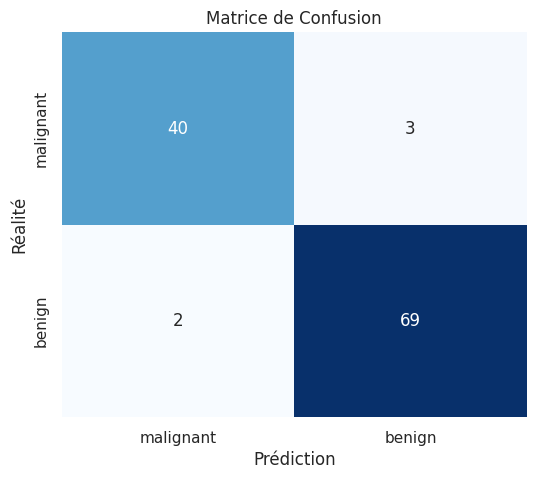


--- FIN DU SCRIPT ---


In [3]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT PÉDAGOGIQUE)
# Auteur : Votre Professeur IA
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn spécifiques
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration pour des graphiques plus esthétiques
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Pour garder la sortie propre

print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
# Chargement du dataset depuis Scikit-Learn
data = load_breast_cancer()

# Création du DataFrame Pandas
# data.data contient les features, data.target contient la cible (0 ou 1)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(f"2. Données chargées. Taille du dataset : {df.shape}")
print(f"   Classes : {data.target_names} (0 = Malin, 1 = Bénin)\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE "DONNÉES SALES" (Pour l'exercice)
# ------------------------------------------------------------------------------
# Dans la vraie vie, les données sont rarement parfaites.
# Nous allons introduire artificiellement des valeurs manquantes (NaN) dans 5% des données.
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42) # Pour la reproductibilité
mask = np.random.random(df.shape) < 0.05 # Masque de 5%

# On applique les NaN partout sauf sur la colonne 'target' (qu'on ne veut pas abîmer ici)
features_columns = df.columns[:-1]
df_dirty = df.copy()
for col in features_columns:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

print(f"   Nombre total de valeurs manquantes générées : {df_dirty.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE ET PRÉPARATION (Data Wrangling)
# ------------------------------------------------------------------------------
print("4. Nettoyage des données...")

# Séparation Features (X) et Target (y) AVANT le nettoyage pour éviter les fuites de données
X = df_dirty.drop('target', axis=1)
y = df_dirty['target']

# Imputation : Remplacer les NaN par la MOYENNE de la colonne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# On remet sous forme de DataFrame pour garder les noms de colonnes (plus propre)
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

print("   Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"   Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# ------------------------------------------------------------------------------
print("5. Analyse Exploratoire (EDA)...")

# A. Aperçu statistique
print("   Statistiques descriptives (premières 5 colonnes) :")
print(X_clean.iloc[:, :5].describe())

# B. Visualisation 1 : Distribution d'une feature clé
plt.figure(figsize=(10, 5))
feature_to_plot = 'mean radius'
sns.histplot(data=df, x=feature_to_plot, hue='target', kde=True, element="step")
plt.title(f"Distribution de '{feature_to_plot}' selon le diagnostic (0=Malin, 1=Bénin)")
plt.show()

# C. Visualisation 2 : Heatmap de corrélation (sur les 10 premières variables pour la lisibilité)
plt.figure(figsize=(10, 8))
correlation_matrix = X_clean.iloc[:, :10].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Top 10 Features)")
plt.show()

# ------------------------------------------------------------------------------
# 6. SÉPARATION DES DONNÉES (Train / Test Split)
# ------------------------------------------------------------------------------
# On garde 20% des données pour le test final
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

print(f"\n6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} échantillons")
print(f"   Test : {X_test.shape[0]} échantillons\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (Machine Learning)
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle (Random Forest Classifier)...")

# Initialisation du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement sur les données d'entraînement uniquement
model.fit(X_train, y_train)
print("   Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION ET PERFORMANCE
# ------------------------------------------------------------------------------
print("8. Évaluation des performances...")

# Prédictions sur le jeu de test (données jamais vues par le modèle)
y_pred = model.predict(X_test)

# A. Accuracy (Précision globale)
acc = accuracy_score(y_test, y_pred)
print(f"   >>> Accuracy Score : {acc*100:.2f}%")

# B. Rapport détaillé
print("\n   >>> Rapport de Classification :")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# C. Matrice de Confusion Visuelle
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

print("\n--- FIN DU SCRIPT ---")